# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [5]:
conda install scikit-learn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lukas\anaconda3\envs\streamlit_sinasc_env

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-1.6.1         |  py312h585ebfc_0         9.5 MB
    scipy-1.15.2               |  py312h9d85e7c_1        25.9 MB
    ------------------------------------------------------------
                                           Total:        35.4 MB

The following NEW packages will be INSTALLED:

  icc_rt             pkgs/main/win-64::icc_rt-2022.1.0-h6049295_2 
  joblib             pkgs/main/win-64::joblib-1.4.2-py312haa95532_0 
  scikit-learn       pkgs/main/win-64::scikit-learn-1.6.1-py312h585ebfc_0 
  scipy              pkgs/main/win-64::scipy-1.15.2-py312h9d85e7c_1 
  threadpoolctl      pkgs/main/win-64::threadp

In [3]:
conda install numpy

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lukas\anaconda3\envs\streamlit_sinasc_env

  added / updated specs:
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mkl-service-2.4.0          |  py312h827c3e9_2          64 KB
    mkl_fft-1.3.11             |  py312h827c3e9_0         169 KB
    mkl_random-1.2.8           |  py312h0158946_0         252 KB
    numpy-2.2.4                |  py312hb0d8612_0          12 KB
    numpy-base-2.2.4           |  py312h557a8af_0         8.7 MB
    setuptools-72.1.0          |  py312haa95532_0         2.9 MB
    ------------------------------------------------------------
                                           Total:        12.2 MB

The following NEW packages will be INSTALLED:

  blas               pkgs/main/win-64::blas-1.0-mkl 
  intel-openmp      

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import patsy
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('previsao_de_renda.csv')

In [9]:
df.info()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [10]:
for col in ['data_ref', 'index']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

df.dropna(inplace=True)
df['log_renda'] = np.log(df['renda'])

formula = 'log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'
y, X = patsy.dmatrices(formula, df, return_type='dataframe')

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_r2 = r2_score(y_test, ridge.predict(X_test_scaled))

print(f'Ridge - Melhor alpha: {ridge.alpha_:.4f} | R² teste: {ridge_r2:.4f}')

lasso = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_r2 = r2_score(y_test, lasso.predict(X_test_scaled))

print(f'Lasso - Melhor alpha: {lasso.alpha_:.4f} | R² teste: {lasso_r2:.4f}')

stepwise_X = X.copy()
stepwise_X['Intercept'] = 1
cols = list(stepwise_X.columns)
removed = []
current_score = sm.OLS(y, stepwise_X).fit().rsquared_adj

for col in cols:
    temp_cols = cols.copy()
    temp_cols.remove(col)
    temp_model = sm.OLS(y, stepwise_X[temp_cols]).fit()
    if temp_model.rsquared_adj > current_score:
        cols = temp_cols
        current_score = temp_model.rsquared_adj
        removed.append(col)

final_model = sm.OLS(y, stepwise_X[cols]).fit()
stepwise_r2 = r2_score(y_test, final_model.predict(X_test[cols]))

print(f'Stepwise - R² teste: {stepwise_r2:.4f}')
print("Variáveis removidas:", removed)

df['idade_emprego'] = df['idade'] * df['tempo_emprego']
formula2 = formula + ' + idade_emprego'
y2, X2 = patsy.dmatrices(formula2, df, return_type='dataframe')
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2.values.ravel(), test_size=0.25, random_state=42)
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)
ridge2 = RidgeCV(alphas=alphas, cv=5)
ridge2.fit(X2_train_scaled, y2_train)
ridge2_r2 = r2_score(y2_test, ridge2.predict(X2_test_scaled))

print(f'Ridge com transformação - R² teste: {ridge2_r2:.4f}')

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
tree_r2 = r2_score(y_test, tree.predict(X_test))

print(f'Árvore de Regressão - R² teste: {tree_r2:.4f}')

Ridge - Melhor alpha: 0.1000 | R² teste: 0.2321
Lasso - Melhor alpha: 0.0050 | R² teste: 0.2331


C:\Users\lukas\anaconda3\envs\streamlit_sinasc_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lukas\anaconda3\envs\streamlit_sinasc_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1793.868349967292, tolerance: 0.4763234866940377
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lukas\anaconda3\envs\streamlit_sinasc_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lukas\anaconda3\envs\strea

Stepwise - R² teste: 0.1971
Variáveis removidas: ['Intercept', 'posse_de_veiculo[T.True]', 'tipo_renda[T.Bolsista]', 'estado_civil[T.União]']
Ridge com transformação - R² teste: 0.2322
Árvore de Regressão - R² teste: 0.2238


In [12]:
df.columns

Index(['Unnamed: 0', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'mau', 'renda', 'log_renda', 'idade_emprego'],
      dtype='object')

In [14]:
X = df.drop(columns=['renda', 'Unnamed: 0', 'log_renda'])  
y = df['renda']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9349, 13) (3117, 13) (9349,) (3117,)


In [16]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
ridge_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    score = r2_score(y_test, y_pred)
    ridge_scores.append((alpha, score))

ridge_scores

[(0, 0.2189529780422248),
 (0.001, 0.21895323423952617),
 (0.005, 0.2189542564187903),
 (0.01, 0.21895552830269194),
 (0.05, 0.21896547590450532),
 (0.1, 0.21897736992528916)]

In [20]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

lasso_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    score = r2_score(y_test, y_pred)
    lasso_scores.append((alpha, score))

lasso_scores

C:\Users\lukas\anaconda3\envs\streamlit_sinasc_env\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\lukas\anaconda3\envs\streamlit_sinasc_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\lukas\anaconda3\envs\streamlit_sinasc_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.269e+10, tolerance: 2.156e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented i

[(0, 0.21895250833318125),
 (0.001, 0.21895362528068274),
 (0.005, 0.21895807857966454),
 (0.01, 0.21896361263758624),
 (0.05, 0.21900658235575854),
 (0.1, 0.2190570457629012)]

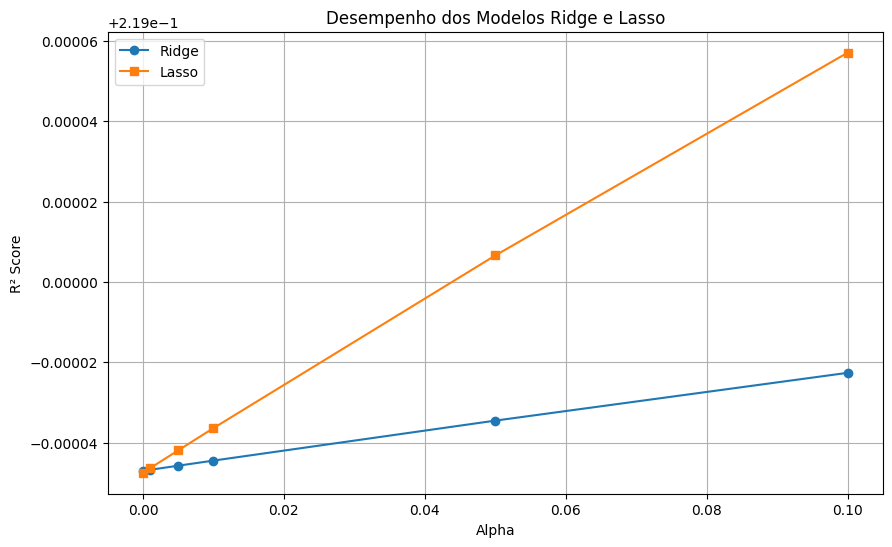

In [24]:
import matplotlib.pyplot as plt

ridge_alphas, ridge_r2 = zip(*ridge_scores)
lasso_alphas, lasso_r2 = zip(*lasso_scores)

plt.figure(figsize=(10, 6))
plt.plot(ridge_alphas, ridge_r2, label='Ridge', marker='o')
plt.plot(lasso_alphas, lasso_r2, label='Lasso', marker='s')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Desempenho dos Modelos Ridge e Lasso')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
melhor_ridge = max(ridge_scores, key=lambda x: x[1])
melhor_lasso = max(lasso_scores, key=lambda x: x[1])

print(f"Melhor Ridge: alpha={melhor_ridge[0]}, R²={melhor_ridge[1]:.4f}")
print(f"Melhor Lasso: alpha={melhor_lasso[0]}, R²={melhor_lasso[1]:.4f}")

Melhor Ridge: alpha=0.1, R²=0.2190
Melhor Lasso: alpha=0.1, R²=0.2191


In [26]:
modelo_final = Ridge(alpha=melhor_ridge[0])
modelo_final.fit(X_train_encoded, y_train)

y_pred_final = modelo_final.predict(X_test_encoded)

r2_final = r2_score(y_test, y_pred_final)
print(f"R² final com modelo Ridge: {r2_final:.4f}")

R² final com modelo Ridge: 0.2190
